In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [18]:
file_path = '2022-2023 Football Team Stats.csv'
data = pd.read_csv(file_path)
data = pd.read_csv(file_path, delimiter=';')

print(data)

    Rk            Squad Country  LgRk  MP   W   D   L  GF  GA  GD  Pts  \
0    1        Barcelona     ESP     1  29  23   4   2  53   9  44   73   
1    2           Napoli     ITA     1  30  24   3   3  66  21  45   75   
2    3        Paris S-G     FRA     1  32  24   3   5  75  31  44   75   
3    4          Arsenal     ENG     1  32  23   6   3  77  34  43   75   
4    5  Manchester City     ENG     2  30  22   4   4  78  28  50   70   
..  ..              ...     ...   ...  ..  ..  ..  ..  ..  ..  ..  ...   
93  94          Ajaccio     FRA    19  31   6   3  22  22  58 -36   21   
94  95        Cremonese     ITA    19  30   3  10  17  27  54 -27   19   
95  96        Sampdoria     ITA    20  31   3   8  20  20  52 -32   17   
96  97            Elche     ESP    20  29   2   7  20  20  59 -39   13   
97  98           Angers     FRA    20  32   3   5  24  25  68 -43   14   

    Pts/MP    xG   xGA   xGD  xGD/90  Attendance  \
0     2.52  55.9  22.7  33.2    1.14       83148   
1     2

In [19]:
print(data.columns)


Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')


C:\Users\UTENTE\AppData\Local\Temp\ipykernel_25772\2131777526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_attack_teams, x='Squad', y='GF', palette='viridis')


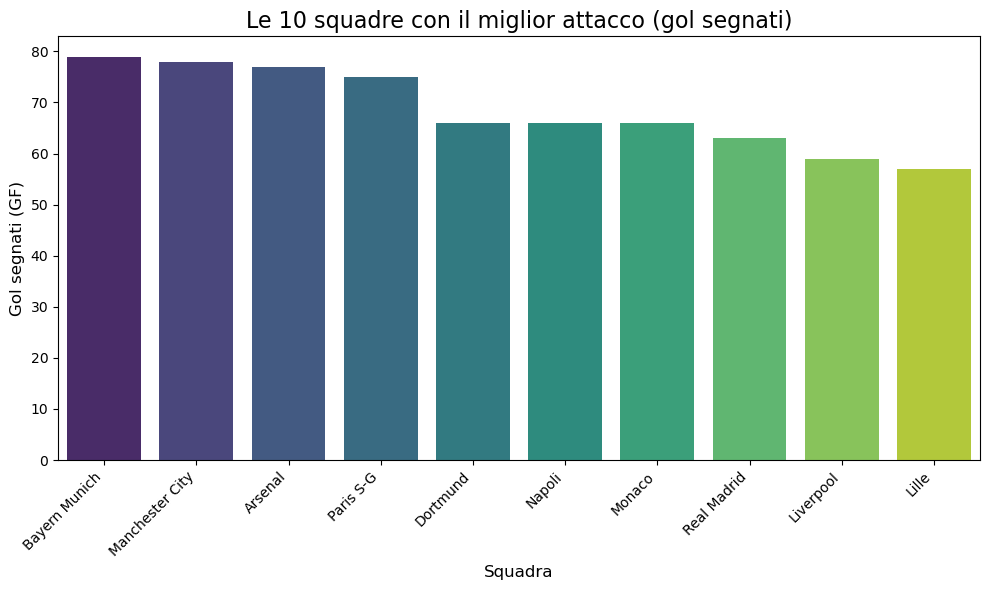

In [32]:


# Carica il dataset con il delimitatore corretto
file_path = '2022-2023 Football Team Stats.csv'
data = pd.read_csv(file_path, delimiter=';')# in quanto il dataset ha le colonne delimitate da ;


# Ordina le squadre per gol segnati (GF) in ordine decrescente e prendi le prime 10
top_attack_teams = data[['Squad', 'GF']].sort_values(by='GF', ascending=False).head(10)

# Crea un grafico a barre per visualizzare le squadre con il miglior attacco (gol segnati)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_attack_teams, x='Squad', y='GF', palette='viridis')

# Impostazioni del grafico
plt.title('Le 10 squadre con il miglior attacco (gol segnati)', fontsize=16)
plt.xlabel('Squadra', fontsize=12)
plt.ylabel('Gol segnati (GF)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



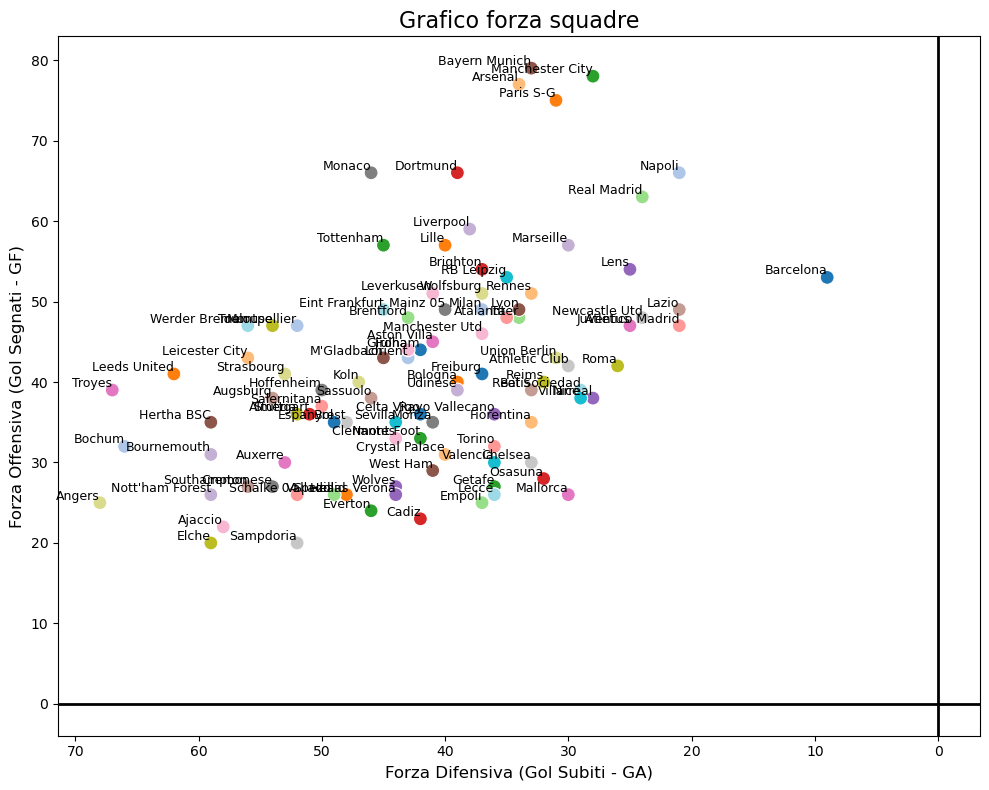

In [31]:


# Creazione grafico a dispersione
plt.figure(figsize=(10, 8))

# Grafico a dispersione con 'GF' per forza offensiva (verticale) e 'GA' per forza difensiva (orizzontale)
sns.scatterplot(data=data, x='GA', y='GF', hue='Squad', palette='tab20', s=100, legend=False)

plt.gca().invert_xaxis()

# Aggiunta nomi delle squadre accanto ai punti
for i in range(len(data)):
    plt.text(data['GA'].iloc[i], data['GF'].iloc[i], data['Squad'].iloc[i], fontsize=9, ha='right', va='bottom')

# Impostazioni del grafico
plt.axhline(0, color='black', linewidth=2)  # Linea orizzontale per separare i quadranti
plt.axvline(0, color='black', linewidth=2)  # Linea verticale per separare i quadranti
plt.title('Grafico forza squadre', fontsize=16)
plt.xlabel('Forza Difensiva (Gol Subiti - GA)', fontsize=12)
plt.ylabel('Forza Offensiva (Gol Segnati - GF)', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:


# estrae la colonna "Top Team Scorer" e separa il nome del calciatore dai gol
data[['Top Scorer', 'Goals']] = data['Top Team Scorer'].str.split(' - ', expand=True)

data['Goals'] = pd.to_numeric(data['Goals'])

#ordina i dati in base alla colonna 'Goals' in ordine decrescente
top_scorers = data[['Squad', 'Top Scorer', 'Goals']].sort_values(by='Goals', ascending=False).head(20)

#ordina indice
top_scorers = top_scorers.reset_index(drop=True)  

# Visualizza la tabella dei 20 migliori marcatori
print(top_scorers)



              Squad           Top Scorer  Goals
0   Manchester City       Erling Haaland     32
1         Tottenham           Harry Kane     23
2         Paris S-G        Kylian Mbappe     22
3             Lille       Jonathan David     21
4            Napoli       Victor Osimhen     21
5              Lyon  Alexandre Lacazette     19
6         Brentford           Ivan Toney     19
7             Reims      Folarin Balogun     18
8         Barcelona   Robert Lewandowski     17
9            Monaco    Wissam Ben Yedder     17
10             Lens          Lois Openda     17
11    Werder Bremen      Niclas Fullkrug     16
12        Liverpool        Mohamed Salah     16
13       Strasbourg         Habib Diallo     15
14          Arsenal           Martinelli     15
15   Manchester Utd      Marcus Rashford     15
16      Real Madrid        Karim Benzema     14
17      Aston Villa        Ollie Watkins     14
18            Inter     Lautaro Martinez     14
19         Atalanta      Ademola Lookman

C:\Users\UTENTE\AppData\Local\Temp\ipykernel_25772\3756162266.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_italian_teams['Pts'], shade=True, color='skyblue', alpha=0.6)


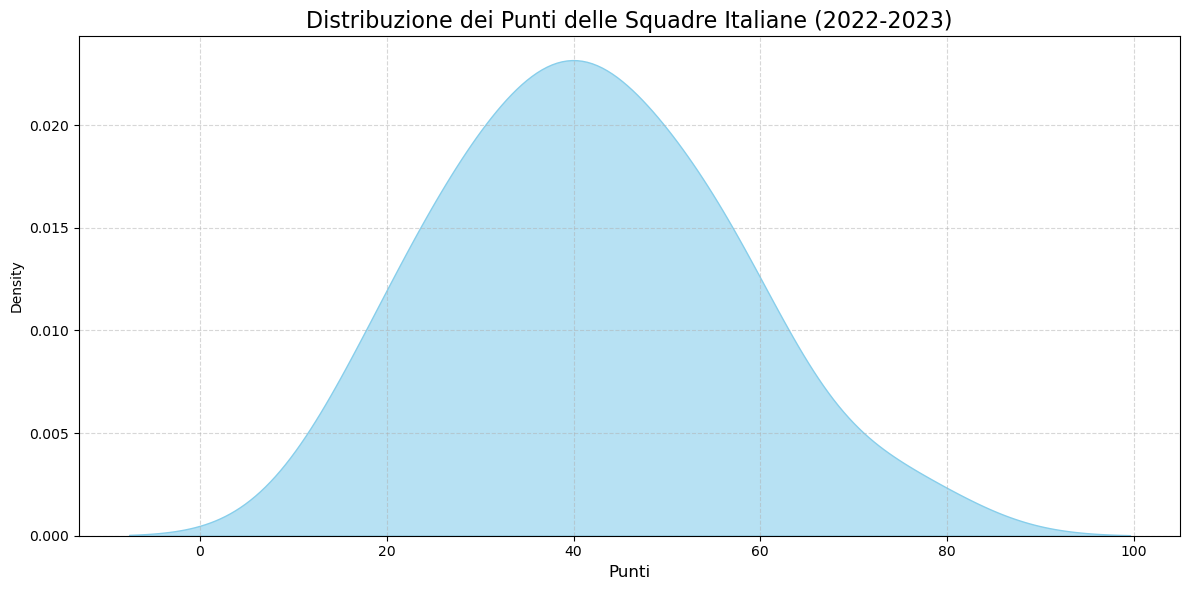

In [48]:

italian_teams = data[data['Country'] == 'ITA']

# Ordina le squadre italiane per punti in ordine decrescente
top_italian_teams = italian_teams[['Squad', 'Pts']].sort_values(by='Pts', ascending=False)

plt.figure(figsize=(12, 6))
sns.kdeplot(top_italian_teams['Pts'], shade=True, color='skyblue', alpha=0.6)

# Impostazioni del grafico
plt.title('Distribuzione  Punti delle Squadre Italiane (2022-2023)', fontsize=16)
plt.xlabel('Punti', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()






C:\Users\UTENTE\AppData\Local\Temp\ipykernel_25772\1803940199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Squad', y='Attendance', data=top_attendance_teams, palette='viridis')


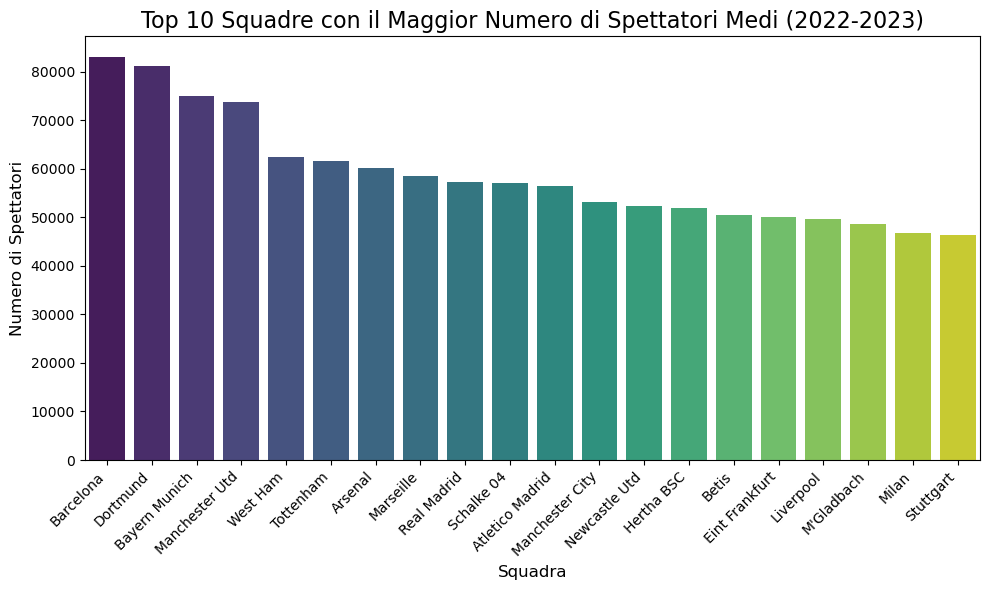

In [53]:

# Filtra le squadre con i maggiori spettatori (attendance)
top_attendance_teams = data[['Squad', 'Attendance']].sort_values(by='Attendance', ascending=False).head(20)

# Crea un grafico a barre 
plt.figure(figsize=(10, 6))
sns.barplot(x='Squad', y='Attendance', data=top_attendance_teams, palette='viridis')

# Impostazioni del grafico
plt.title('Top 10 Squadre con il Maggior Numero di Spettatori Medi (2022-2023)', fontsize=16)
plt.xlabel('Squadra', fontsize=12)
plt.ylabel('Numero di Spettatori', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostra il grafico
plt.show()
